In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

# Database connection details
db_config = {
    'host': 'betting-db.cp86ssaw6cm7.us-east-1.rds.amazonaws.com',
    'user': 'admin',
    'password': '7nRB1i2&A-K>',
    'database': 'betting_db'
}

/var/folders/lj/2t8twtsx5v1dw1dkbr59j1xr0000gn/T/ipykernel_82705/1362212853.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


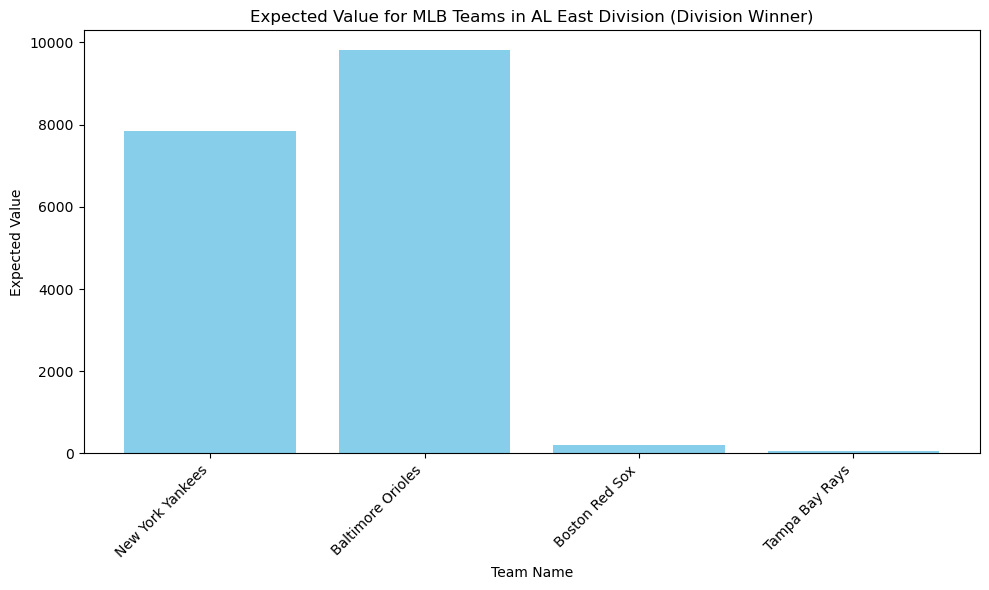

In [3]:
# SQL query
query = """
SELECT
    l.ParticipantName AS Team,
    l.EventType,
    SUM(b.PotentialPayout * b.ImpliedOdds) AS ExpectedValue
FROM
    legs l
JOIN
    bets b ON l.WagerID = b.WagerID
WHERE
    l.LeagueName = 'MLB'
    AND b.WhichBankroll = 'GreenAleph'
    AND l.IsFuture = 'Yes'
    AND b.LegCount = 1
    AND l.EventLabel = 'AL East'
    AND l.EventType = 'Division Winner'
GROUP BY
    l.ParticipantName,
    l.EventType;
"""

# Connect to the database and execute the query
conn = mysql.connector.connect(**db_config)
df = pd.read_sql(query, conn)
conn.close()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['Team'], df['ExpectedValue'], color='skyblue')
plt.xlabel('Team Name')
plt.ylabel('Expected Value')
plt.title('Expected Value for MLB Teams in AL East Division (Division Winner)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels

# Show the plot
plt.show()


/var/folders/lj/2t8twtsx5v1dw1dkbr59j1xr0000gn/T/ipykernel_82705/271652339.py:37: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


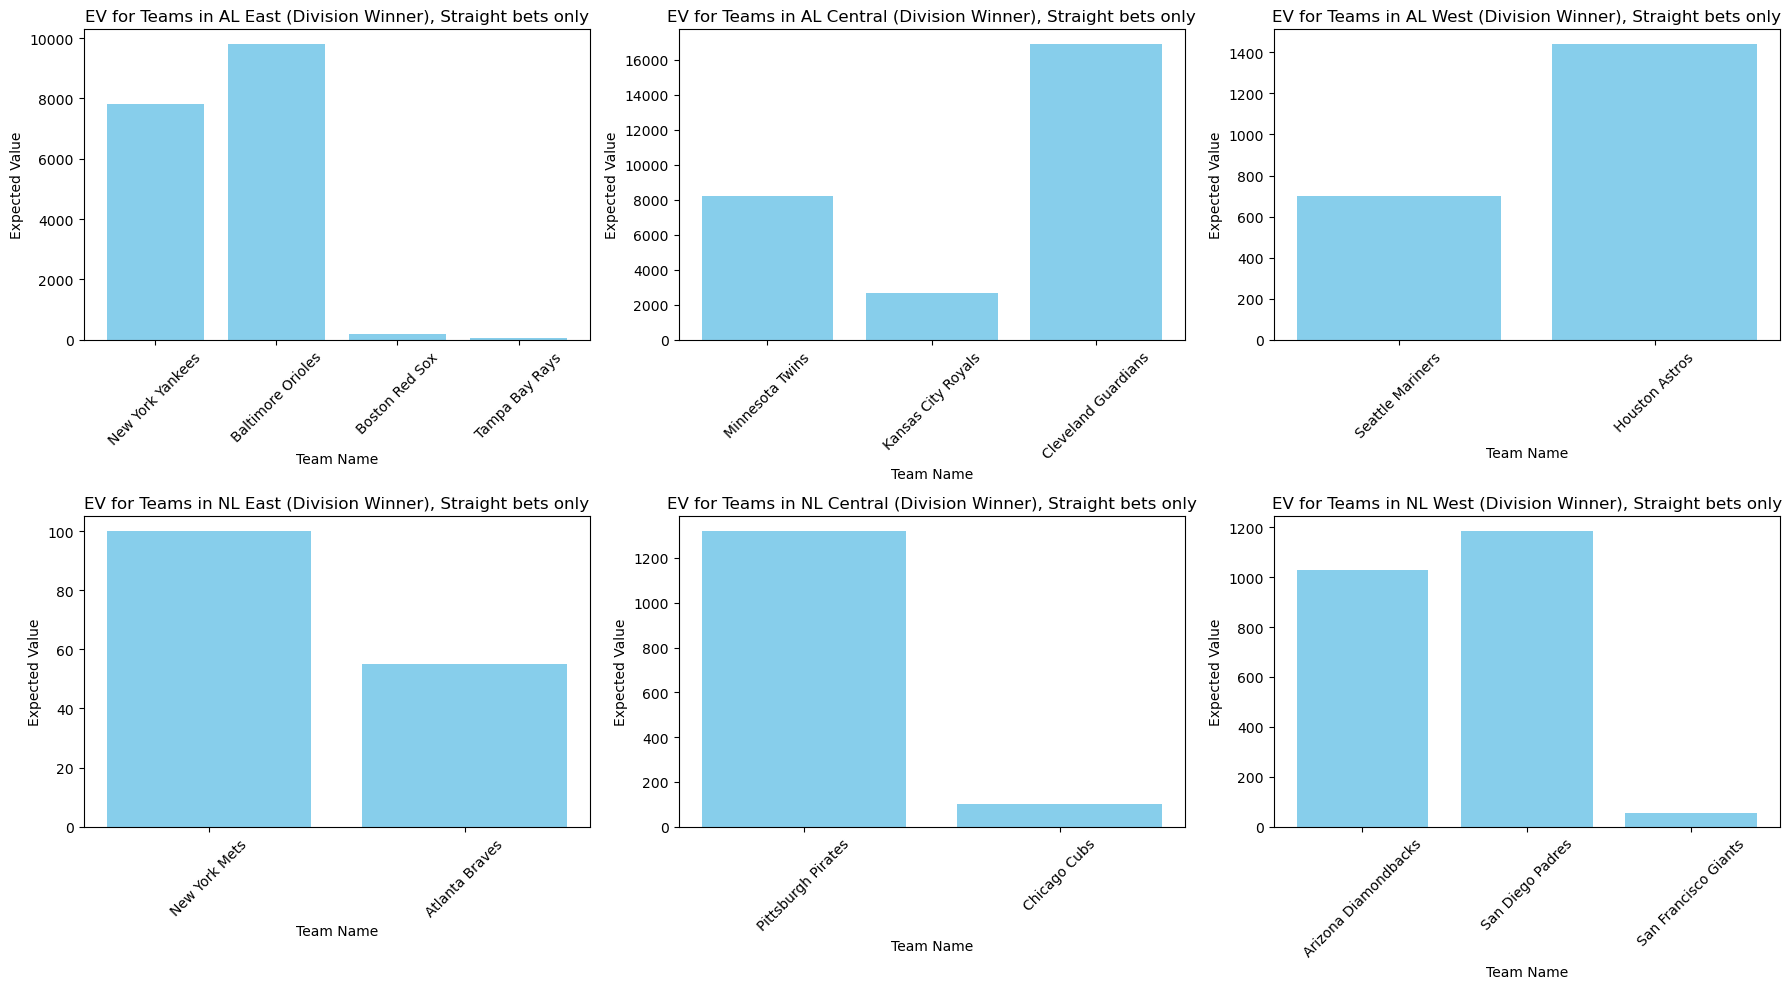

In [5]:
# List of EventLabels
event_labels = ['AL East', 'AL Central', 'AL West', 'NL East', 'NL Central', 'NL West']

# SQL query template
query_template = """
SELECT
    l.ParticipantName AS Team,
    l.EventType,
    SUM(b.PotentialPayout * b.ImpliedOdds) AS ExpectedValue
FROM
    legs l
JOIN
    bets b ON l.WagerID = b.WagerID
WHERE
    l.LeagueName = 'MLB'
    AND b.WhichBankroll = 'GreenAleph'
    AND l.IsFuture = 'Yes'
    AND b.LegCount = 1
    AND l.EventLabel = '{}'
    AND l.EventType = 'Division Winner'
GROUP BY
    l.ParticipantName,
    l.EventType;
"""

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D

# Loop through each EventLabel and generate the corresponding bar chart
for i, event_label in enumerate(event_labels):
    # Construct the query for the current EventLabel
    query = query_template.format(event_label)
    
    # Connect to the database and execute the query
    conn = mysql.connector.connect(**db_config)
    df = pd.read_sql(query, conn)
    conn.close()
    
    # Plot the bar chart
    axes[i].bar(df['Team'], df['ExpectedValue'], color='skyblue')
    axes[i].set_xlabel('Team Name')
    axes[i].set_ylabel('Expected Value')
    axes[i].set_title(f'EV for Teams in {event_label} (Division Winner), Straight bets only')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
